In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from os import listdir
import cv2
from matplotlib.image import imread
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.manifold import TSNE
import time
from tqdm import tqdm
import sys

In [2]:
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

# Import des photos

In [3]:
path = "C:/Users/Helene/Documents/03_DataScience/02_FORMATION/OpenClassRooms/01_PROJETS/P6/01_DATA/Flipkart/Images/"
list_photos = [file for file in listdir(path)]
print(len(list_photos))

1050


# Attribution des labels cibles aux photos

In [4]:
data = pd.read_csv(
    '../01_DATA/target.csv')
data.shape

(1050, 4)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1050 non-null   int64 
 1   uniq_id     1050 non-null   object
 2   image       1050 non-null   object
 3   categ_0     1050 non-null   object
dtypes: int64(1), object(3)
memory usage: 32.9+ KB


In [6]:
data = data.drop('Unnamed: 0', axis=1)
data = data.rename(columns={'categ_0':'label'})

In [7]:
data.label.value_counts()

Home Furnishing                150
Baby Care                      150
Watches                        150
Home Decor & Festive Needs     150
Kitchen & Dining               150
Beauty and Personal Care       150
Computers                      150
Name: label, dtype: int64

In [8]:
list_labels = list(data.label.unique())
list_labels

['Home Furnishing ',
 'Baby Care ',
 'Watches ',
 'Home Decor & Festive Needs ',
 'Kitchen & Dining ',
 'Beauty and Personal Care ',
 'Computers ']

In [9]:
labels = data["label"]

In [10]:
from sklearn.preprocessing import LabelEncoder
# transormation des labels en entiers (nécessaire pour calculer matrice de confusion)
labelencoder = LabelEncoder()
labelencoder.fit(labels)
labels_int = labelencoder.transform(labels)
labels_int

array([4, 0, 0, ..., 0, 0, 0])

# Fonctions communes

In [11]:


def clustering_7classes(X, labels):
    cls = KMeans(n_clusters=7, random_state=0)
    cls.fit(X)

    y_pred = cls.labels_

    ARI = adjusted_rand_score(labels, y_pred)
    print("ARI : {:.3f}".format(ARI))
    return y_pred, ARI


In [12]:


def visu_resultats(features, y_pred, ARI, y_true=data.label):
    # Visualisation sur tsne
    tsne = TSNE(n_components=2, init='pca', random_state=0)
    X_tsne = tsne.fit_transform(features)

    plt.figure(figsize=(24, 6))
    plt.subplot(1, 3, 1)
    sns.scatterplot(X_tsne[:, 0], X_tsne[:, 1], hue=y_true)
    plt.legend(bbox_to_anchor=(1, 1))
    plt.title("Catégorisation de référence")

    plt.subplot(1, 3, 2)
    sns.scatterplot(X_tsne[:, 0], X_tsne[:, 1], hue=y_pred)
    plt.legend(bbox_to_anchor=(1, 1))
    plt.title("Résultat du clustering automatique\nARI = {:.3f}".format(ARI))

    plt.subplot(1, 3, 3)
    plt.hist(x=y_pred, bins=7)


In [13]:


def erreur_attribution(y_true, y_pred, labels=labels):
    '''
    calcul et affichage de la matrice de confusion pour identifier
    les classes qui sont bien prédites
    '''
    # Calcul de la matrice de confusion
    conf_mat = confusion_matrix(y_true=y_true, y_pred=y_pred)
    # Alignement le long de la diagonale
    corresp = np.argmax(conf_mat, axis=0)
    print("Correspondance des clusters : ", corresp)
    labels_df = pd.Series(labels, name="labels").to_frame()
    labels_df['y_true'] = y_true
    labels_df['y_pred'] = y_pred
    labels_df['y_pred_transform'] = labels_df['y_pred'].apply(
        lambda x: corresp[x])
    # re-calcul de la nouvelle matrice de confusion
    conf_mat = confusion_matrix(y_true, labels_df.y_pred_transform)
    print(classification_report(y_true, labels_df.y_pred_transform))
    # visu
    corresp = pd.DataFrame(corresp, columns=['corresp'])
    corresp = corresp.sort_values(by='corresp', axis=0)
    index = list(corresp.index)
    df_cm = pd.DataFrame(conf_mat, index=[label for label in list_labels],
                         columns=[i for i in index])
    plt.figure(figsize=(8, 6))
    sns.heatmap(df_cm, annot=True, cmap="Blues")


In [14]:


def reduction_dimension(X):
    print("Réduction de dimension : ACP")
    print("Dimensions dataset avant réduction PCA : ", X.shape)
    pca = PCA(n_components=0.99, random_state=0)
    feat_pca = pca.fit_transform(X)
    print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

    return feat_pca


# Affichage d'images par label

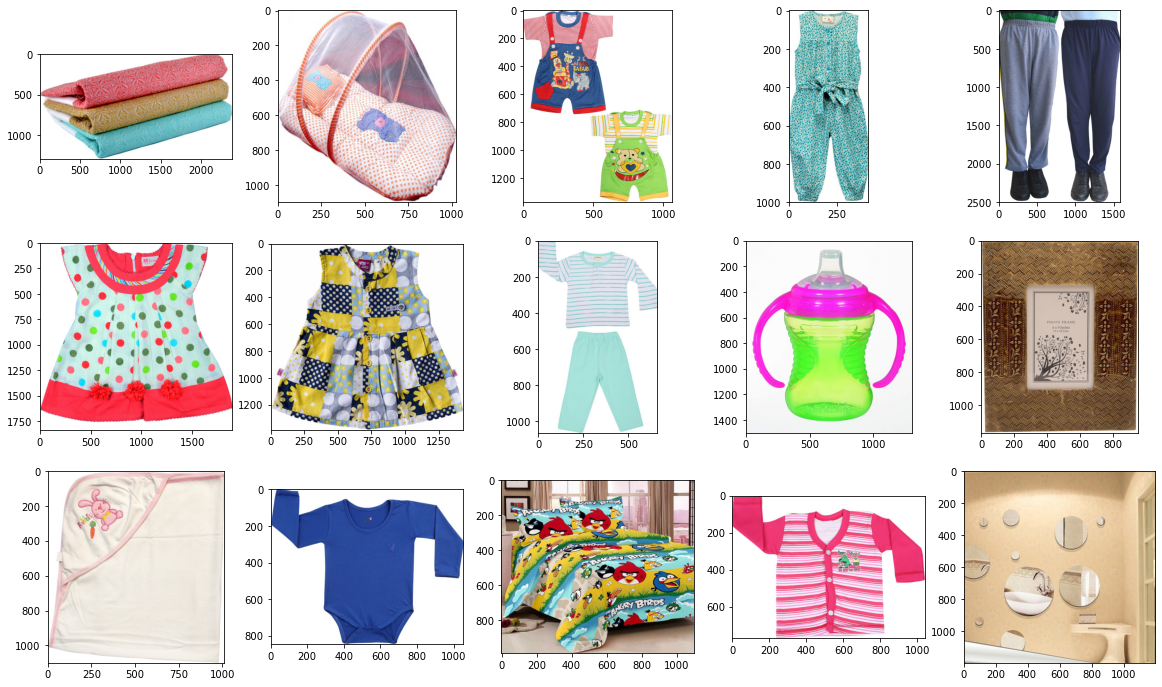

In [15]:
liste_baby = data[data.label == 'Baby Care ']['image']
compteur = 0
i = 1
plt.figure(figsize=(20,12))
for img in liste_baby:
    if compteur%10 == 0:
        plt.subplot(3,5,i)
        filename = path + img
        image = imread(filename)
        plt.imshow(image)
        i += 1
    compteur += 1
plt.show()


-------
Home Furnishing 


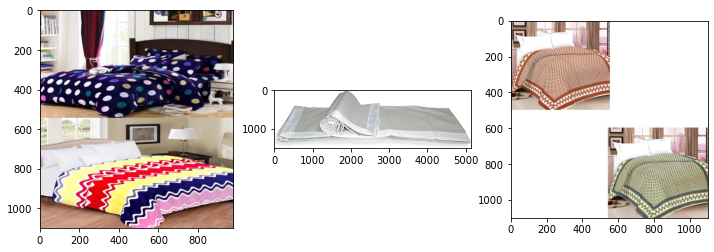

-------
Baby Care 


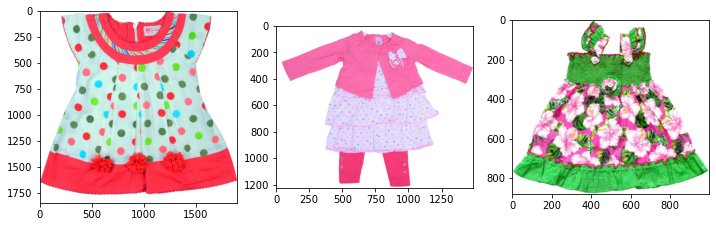

-------
Watches 


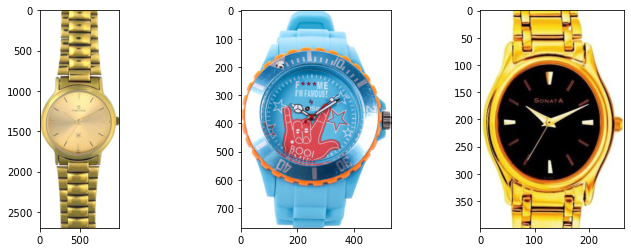

-------
Home Decor & Festive Needs 


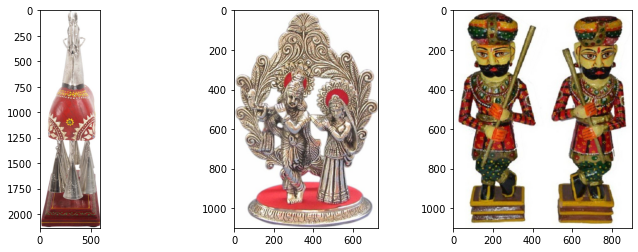

-------
Kitchen & Dining 


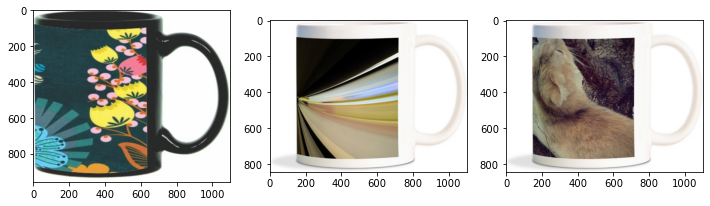

-------
Beauty and Personal Care 


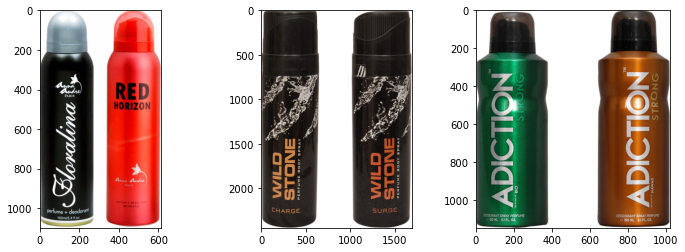

-------
Computers 


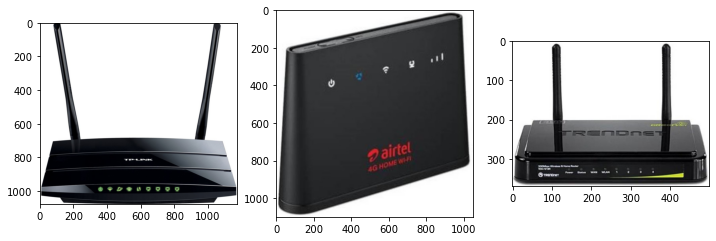

In [16]:


def list_fct(name) :
    list_image_name = list(data[data.label == name]['image'])
    return list_image_name

for name in list_labels :
    print("-------")
    print(name)
    plt.figure(figsize=(12,4))
    for i in range(3):
        plt.subplot(130 + 1 + i)
        filename = path + list_fct(name)[50+i]
        image = imread(filename)
        plt.imshow(image)
    plt.show()

In [17]:
cv2.__version__

'4.5.5'

# Mise en place de SIFT sur une image

Text(0.5, 1.0, 'Image originale')

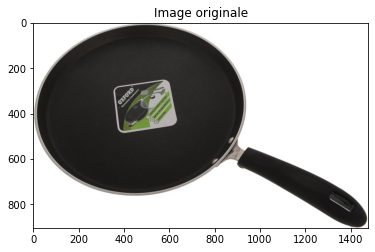

In [18]:
filename = path + list_photos[1]
image = imread(filename)
plt.imshow(image)
plt.title('Image originale')

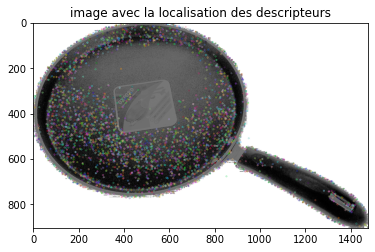

Descripteurs :  (4656, 128)

[[ 4.  2.  6. ...  5.  0.  0.]
 [96. 20.  0. ...  9.  2.  0.]
 [55. 16.  0. ...  0.  1.  0.]
 ...
 [12.  0.  0. ...  0.  0.  0.]
 [67. 19.  5. ...  0. 34. 13.]
 [ 0.  5. 27. ...  0.  0.  0.]]


In [19]:
sift = cv2.xfeatures2d.SIFT_create()
# prétraitement
image = cv2.imread(path+list_photos[1],0) # conversion en NB
image = cv2.equalizeHist(image)   # égalise l'histogramme
# détection des descripteurs
kp, des = sift.detectAndCompute(image, None)
# affichage de l'image avec les descripteurs
img=cv2.drawKeypoints(image,kp,image)
plt.imshow(img)
plt.title('image avec la localisation des descripteurs')
plt.show()
print("Descripteurs : ", des.shape)
print()
print(des)

Il y a 4656 descripteurs sur cette image

# Mise en place de SIFT sur toutes les images
## création des descripteurs pour chaque image

In [20]:
data

uniq_id                                 image  \
0     55b85ea15a1536d46b7190ad6fff8ce7  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1     7b72c92c2f6c40268628ec5f14c6d590  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2     64d5d4a258243731dc7bbb1eef49ad74  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3     d4684dcdc759dd9cdf41504698d737d8  d4684dcdc759dd9cdf41504698d737d8.jpg   
4     6325b6870c54cd47be6ebfbffa620ec7  6325b6870c54cd47be6ebfbffa620ec7.jpg   
...                                ...                                   ...   
1045  958f54f4c46b53c8a0a9b8167d9140bc  958f54f4c46b53c8a0a9b8167d9140bc.jpg   
1046  fd6cbcc22efb6b761bd564c28928483c  fd6cbcc22efb6b761bd564c28928483c.jpg   
1047  5912e037d12774bb73a2048f35a00009  5912e037d12774bb73a2048f35a00009.jpg   
1048  c3edc504d1b4f0ba6224fa53a43a7ad6  c3edc504d1b4f0ba6224fa53a43a7ad6.jpg   
1049  f2f027ad6a6df617c9f125173da71e44  f2f027ad6a6df617c9f125173da71e44.jpg   

                 label  
0     Home Furnishing   
1           Baby Care   
2           Baby Care   
3     Home Furnishing   
4     Home Furnishing   
...                ...  
1045        Baby Care   
1046        Baby Care   
1047        Baby Care   
1048        Baby Care   
1049        Baby Care   

[1050 rows x 3 columns]

In [21]:
sift_keypoints = pd.DataFrame(columns=['image', 'sift_keypoints'])
temps1=time.time()
sift = cv2.xfeatures2d.SIFT_create(nfeatures=500)
'''
nfeatures = nombre min de features à garder. S'il y en a plus, l'algo ne garde que les
meilleurs descripteurs (basé sur le contraste local, mesure interne à l'algo SIFT)
'''
i=0
for img in tqdm(data.image) :
    # pre-traitement image
    image = cv2.imread(path+img,0)
    res = cv2.equalizeHist(image)
    # calcul des descripteurs
    kp, des = sift.detectAndCompute(res, None)
    sift_keypoints.loc[i,'image'] = img
    sift_keypoints.loc[i, 'sift_keypoints'] = des
    i += 1

sift_keypoints_by_img = sift_keypoints # np.asarray(sift_keypoints)
sift_keypoints_all    = np.concatenate(list(sift_keypoints_by_img.sift_keypoints), axis=0)

print()
print("Nombre de descripteurs : ", sift_keypoints_all.shape)

duration1=time.time()-temps1
print("temps de traitement SIFT descriptor : ", "%15.2f" % duration1, "secondes")

100%|██████████| 1050/1050 [06:48<00:00,  2.57it/s] 



Nombre de descripteurs :  (517351, 128)
temps de traitement SIFT descriptor :           409.31 secondes


In [22]:
type(des)

numpy.ndarray

In [23]:
# sift_keypoints = []
# temps1=time.time()
# sift = cv2.xfeatures2d.SIFT_create(nfeatures=500)
# '''
# nfeatures = nombre min de features à garder. S'il y en a plus, l'algo ne garde que les
# meilleurs descripteurs (basé sur le contraste local, mesure interne à l'algo SIFT)
# '''
# for img in tqdm(data.image) :
#     print(img)
#     # pre-traitement image
#     image = cv2.imread(path+img,0)
#     res = cv2.equalizeHist(image)
#     # calcul des descripteurs
#     kp, des = sift.detectAndCompute(res, None)
#     sift_keypoints.append(des)

# sift_keypoints_by_img = np.asarray(sift_keypoints)
# sift_keypoints_all    = np.concatenate(sift_keypoints_by_img, axis=0)

# print()
# print("Nombre de descripteurs : ", sift_keypoints_all.shape)

# duration1=time.time()-temps1
# print("temps de traitement SIFT descriptor : ", "%15.2f" % duration1, "secondes")

In [24]:
sift_keypoints_all.shape

(517351, 128)

In [25]:
sift_keypoints_by_img.shape

(1050, 2)

In [26]:
sift_keypoints_by_img

image  \
0     55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1     7b72c92c2f6c40268628ec5f14c6d590.jpg   
2     64d5d4a258243731dc7bbb1eef49ad74.jpg   
3     d4684dcdc759dd9cdf41504698d737d8.jpg   
4     6325b6870c54cd47be6ebfbffa620ec7.jpg   
...                                    ...   
1045  958f54f4c46b53c8a0a9b8167d9140bc.jpg   
1046  fd6cbcc22efb6b761bd564c28928483c.jpg   
1047  5912e037d12774bb73a2048f35a00009.jpg   
1048  c3edc504d1b4f0ba6224fa53a43a7ad6.jpg   
1049  f2f027ad6a6df617c9f125173da71e44.jpg   

                                         sift_keypoints  
0     [[12.0, 7.0, 3.0, 17.0, 15.0, 0.0, 0.0, 1.0, 1...  
1     [[3.0, 6.0, 0.0, 4.0, 2.0, 0.0, 0.0, 0.0, 1.0,...  
2     [[3.0, 2.0, 0.0, 16.0, 56.0, 2.0, 1.0, 5.0, 6....  
3     [[22.0, 26.0, 18.0, 41.0, 29.0, 40.0, 26.0, 39...  
4     [[16.0, 17.0, 47.0, 45.0, 11.0, 6.0, 9.0, 15.0...  
...                                                 ...  
1045  [[3.0, 0.0, 0.0, 55.0, 139.0, 0.0, 0.0, 1.0, 1...  
1046  [[16.0, 0.0, 0.0, 6.0, 85.0, 4.0, 0.0, 0.0, 12...  
1047  [[79.0, 11.0, 1.0, 3.0, 1.0, 4.0, 45.0, 119.0,...  
1048  [[7.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 6.0, 120....  
1049  [[0.0, 0.0, 0.0, 2.0, 10.0, 1.0, 0.0, 0.0, 5.0...  

[1050 rows x 2 columns]

## Création des clusters de descripteurs

In [27]:
from sklearn import cluster, metrics

temps1=time.time()

# Determination du nombre de clusters
k = int(round(np.sqrt(len(sift_keypoints_all)),0))
print("Nombre de clusters estimés : ", k)
print("Création de",k, "clusters de descripteurs ...")

# Clustering
kmeans = cluster.MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=0, batch_size=2048)
kmeans.fit(sift_keypoints_all)

duration1=time.time()-temps1
print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

Nombre de clusters estimés :  719
Création de 719 clusters de descripteurs ...
temps de traitement kmeans :             8.53 secondes


In [28]:
# test avec KMeans ==> TROP LONG
# temps1=time.time()

# k = int(round(np.sqrt(len(sift_keypoints_all)),0))
# print("Nombre de clusters estimés : ", k)
# print("Création de",k, "clusters de descripteurs ...")

# # Clustering
# kmeans_2 = cluster.KMeans(n_clusters=k, random_state=0)
# kmeans_2.fit(sift_keypoints_all)

# duration1=time.time()-temps1
# print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

## Creation des features des images

In [29]:
sift_keypoints_by_img.sift_keypoints[0].shape

(500, 128)

In [30]:
for i, image_desc in enumerate(sift_keypoints_by_img.sift_keypoints):
    print(sift_keypoints_by_img.loc[i, 'image'])
    # print(image_desc)

55b85ea15a1536d46b7190ad6fff8ce7.jpg
7b72c92c2f6c40268628ec5f14c6d590.jpg
64d5d4a258243731dc7bbb1eef49ad74.jpg
d4684dcdc759dd9cdf41504698d737d8.jpg
6325b6870c54cd47be6ebfbffa620ec7.jpg
893aa5ed55f7cff2eccea7758d7a86bd.jpg
f355cc1ccb08bd0d283ed979b7ee7515.jpg
dd0e3470a7e6ed76fd69c2da27721041.jpg
41384da51732c0b4df3de8f395714fbb.jpg
710ed5f2393a4b9e8823aa0029f71f93.jpg
920154acbe49d3202ed7d2ed2df1ea13.jpg
08452abdadb3db1e686b94a9c52fc7b6.jpg
1e8741b5ae27a513546c94b3f3312aee.jpg
189fa66a5fa6f08d2802a62ecf0be298.jpg
bbb8cdc5406ff60ff06ff64630f2ca47.jpg
1120bc768623572513df956172ffefeb.jpg
5479bb7028827d60000720a2c135976a.jpg
733aa1e801a139fa8dc7be9f0eff5ee0.jpg
62c35de4df27437d3597963fac55a8b6.jpg
33d97d63c037078cd3f08033966d6a88.jpg
d7ca2b06b4f4d3b98c61c377b18a2d6b.jpg
f74476ba64365d97a5be7d375cbf4c7a.jpg
fda50982a672ef8835de5c1cc86f8bfc.jpg
4788f5466992da09024b8ffcc8a5cba4.jpg
653826cd53f1d9e2c086c0ac7846ef70.jpg
3c74db45cbfc14a78b8466dca494b3bb.jpg
4aa047f14885c74f155ce5f973e14dff.jpg
7

In [31]:
# Creation des histogrammes (features)
temps1=time.time()

def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist


# Creation de la matrice d'histogrammes
hist_vectors=[]

for i, image_desc in tqdm(enumerate(sift_keypoints_by_img.sift_keypoints)) :
     # calcul de l'histogramme
    hist = build_histogram(kmeans, image_desc, i)
    # ajout à la liste des vecteurs
    hist_vectors.append(hist)

im_features = np.asarray(hist_vectors)
sift_keypoints_by_img['hist_vectors'] = hist_vectors

duration1=time.time()-temps1
print("temps de création histogrammes : ", "%15.2f" % duration1, "secondes")


1050it [00:03, 270.26it/s]

temps de création histogrammes :             3.90 secondes


In [32]:
sift_keypoints_by_img.hist_vectors

0       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1       [0.0, 0.006, 0.0, 0.0, 0.006, 0.0, 0.004, 0.0,...
2       [0.002, 0.002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008,...
3       [0.0, 0.004, 0.0, 0.0, 0.0, 0.0, 0.006, 0.0, 0...
4       [0.006, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012, 0.0, 0...
                              ...                        
1045    [0.01, 0.002, 0.004, 0.0, 0.002, 0.0, 0.0, 0.0...
1046    [0.0, 0.0, 0.0, 0.002, 0.002, 0.0, 0.0, 0.014,...
1047    [0.012, 0.002, 0.0, 0.0, 0.002, 0.0, 0.002, 0....
1048    [0.002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.016, 0...
1049    [0.0, 0.002, 0.0, 0.0, 0.0, 0.008, 0.0, 0.0, 0...
Name: hist_vectors, Length: 1050, dtype: object

In [33]:
im_features.shape

(1050, 719)

In [34]:
im_features

array([[0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.006, 0.   , ..., 0.   , 0.   , 0.004],
       [0.002, 0.002, 0.   , ..., 0.   , 0.   , 0.   ],
       ...,
       [0.012, 0.002, 0.   , ..., 0.   , 0.   , 0.   ],
       [0.002, 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.002, 0.   , ..., 0.002, 0.008, 0.   ]])

# Visualisation avant réduction de dimension

In [35]:
y_pred, ARI = clustering_7classes(X=im_features, labels=labels)

ARI : 0.006


Correspondance des clusters :  [1 3 0 2 0 4 3]
              precision    recall  f1-score   support

           0       0.64      0.05      0.09       150
           1       0.16      0.90      0.27       150
           2       0.33      0.33      0.33       150
           3       0.31      0.09      0.14       150
           4       1.00      0.01      0.01       150
           5       0.00      0.00      0.00       150
           6       0.00      0.00      0.00       150

    accuracy                           0.20      1050
   macro avg       0.35      0.20      0.12      1050
weighted avg       0.35      0.20      0.12      1050



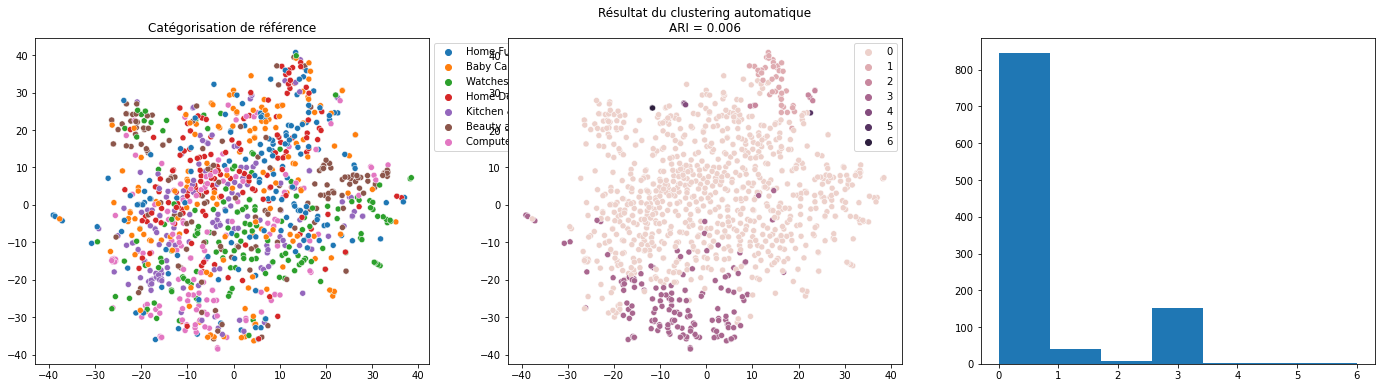

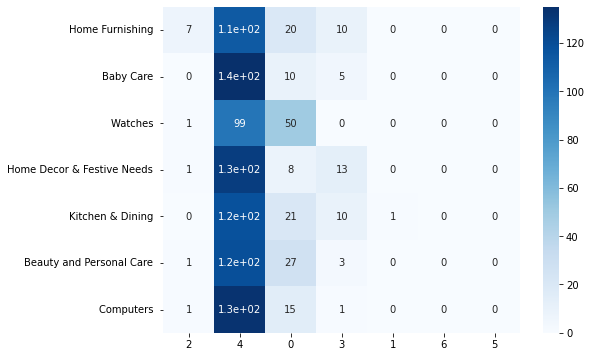

In [36]:
visu_resultats(features=im_features, y_pred=y_pred, ARI=ARI)
erreur_attribution(y_true=labels_int, y_pred=y_pred, labels=labels)

# Réduction de dimension
## PCA

In [38]:
print("Dimensions dataset avant réduction PCA : ", im_features.shape)
pca = PCA(n_components=0.99, random_state=0)
feat_pca= pca.fit_transform(im_features)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 719)
Dimensions dataset après réduction PCA :  (1050, 495)


# Visualisation

In [39]:
y_pred, ARI = clustering_7classes(X=feat_pca, labels=labels)

ARI : 0.027


Correspondance des clusters :  [1 4 3 5 0 2 3]
              precision    recall  f1-score   support

           0       0.44      0.03      0.05       150
           1       0.20      0.71      0.31       150
           2       0.40      0.21      0.28       150
           3       0.33      0.09      0.14       150
           4       0.67      0.01      0.03       150
           5       0.23      0.60      0.33       150
           6       0.00      0.00      0.00       150

    accuracy                           0.24      1050
   macro avg       0.33      0.24      0.16      1050
weighted avg       0.33      0.24      0.16      1050



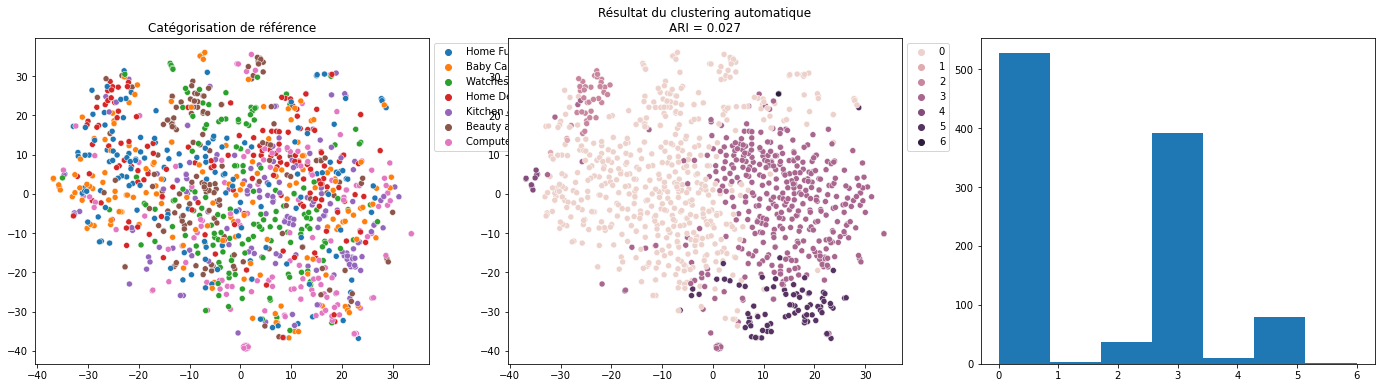

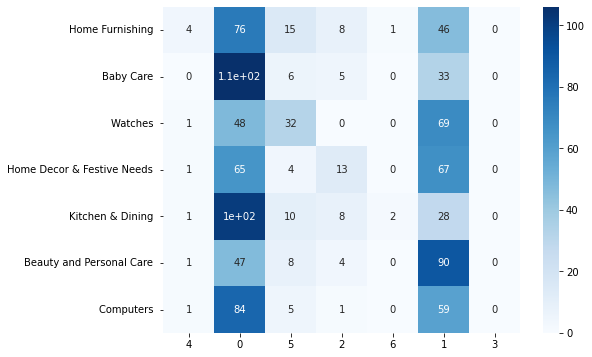

In [40]:
visu_resultats(features=feat_pca, y_pred=y_pred, ARI=ARI)
erreur_attribution(y_true=labels_int, y_pred=y_pred, labels=labels)

ARI très mauvais !!

# Tests SIFT
## Fonctions

In [41]:
def sift_calcul(path, list_photos, ref_image):
    image = cv2.imread(path+list_photos[ref_image],0) # convert in gray
    res = cv2.equalizeHist(image)   # equalize image histogram
    kp, des = sift.detectAndCompute(res, None)
    return kp, des


def clustering_descripteurs(k, sift_descripteurs_all):
    kmeans = cluster.MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=0, batch_size=2048)
    kmeans.fit(sift_descripteurs_all)
    return kmeans


def build_histogram(kmeans, des, ref_image):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : print("problème histogramme image  : ", ref_image)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist 



## Workflow
### Test n_features

----------
test n_features = 0
calcul des descripteurs par image


100%|██████████| 1050/1050 [08:21<00:00,  2.09it/s] 


Nombre de descripteurs :  (9051349, 128)
temps de traitement SIFT descriptor :           506.56 secondes
clustering des descripteurs
Nombre de clusters estimés :  3009
Création de 3009 clusters de descripteurs ...
temps de traitement kmeans :           272.89 secondes
Création des features des images (vecteurs)


1050it [01:09, 15.19it/s]


temps de création histogrammes :            69.17 secondes
Réduction de dimension : ACP
Dimensions dataset avant réduction PCA :  (1050, 3009)
Dimensions dataset après réduction PCA :  (1050, 739)
ARI : 0.001
Visualisation
Correspondance des clusters :  [2 6 5 4 3 3 2]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       150
           1       0.00      0.00      0.00       150
           2       0.44      0.03      0.05       150
           3       0.17      0.46      0.25       150
           4       0.16      0.66      0.26       150
           5       1.00      0.01      0.01       150
           6       0.25      0.03      0.06       150

    accuracy                           0.17      1050
   macro avg       0.29      0.17      0.09      1050
weighted avg       0.29      0.17      0.09      1050



<Figure size 1008x2016 with 0 Axes>

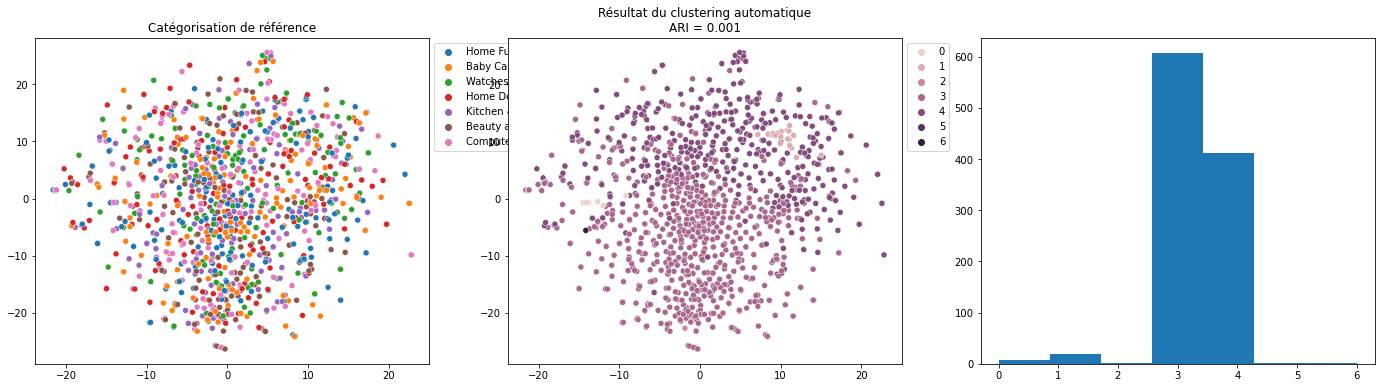

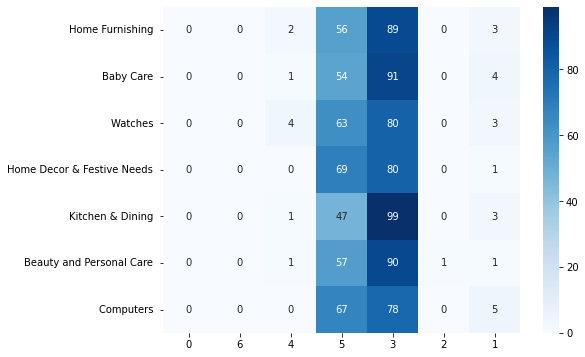

----------
test n_features = 250
calcul des descripteurs par image


100%|██████████| 1050/1050 [06:41<00:00,  2.61it/s] 


Nombre de descripteurs :  (262397, 128)
temps de traitement SIFT descriptor :           403.09 secondes
clustering des descripteurs
Nombre de clusters estimés :  512
Création de 512 clusters de descripteurs ...
temps de traitement kmeans :             3.86 secondes
Création des features des images (vecteurs)


1050it [00:02, 412.37it/s]


temps de création histogrammes :             2.64 secondes
Réduction de dimension : ACP
Dimensions dataset avant réduction PCA :  (1050, 512)
Dimensions dataset après réduction PCA :  (1050, 403)
ARI : 0.002
Visualisation
Correspondance des clusters :  [1 1 3 0 1 1 5]
              precision    recall  f1-score   support

           0       0.17      0.49      0.25       150
           1       0.17      0.69      0.27       150
           2       0.00      0.00      0.00       150
           3       0.25      0.02      0.04       150
           4       0.00      0.00      0.00       150
           5       0.40      0.01      0.03       150
           6       0.00      0.00      0.00       150

    accuracy                           0.17      1050
   macro avg       0.14      0.17      0.08      1050
weighted avg       0.14      0.17      0.08      1050



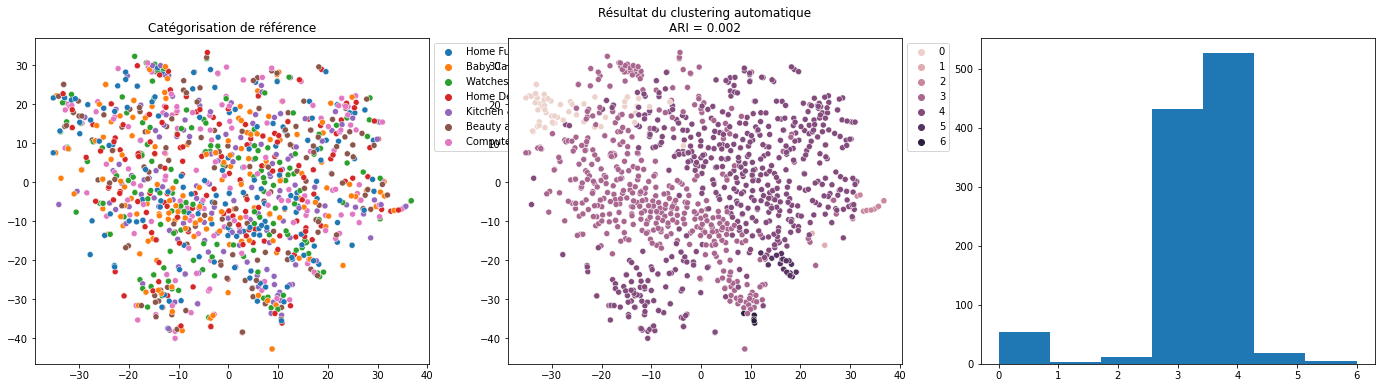

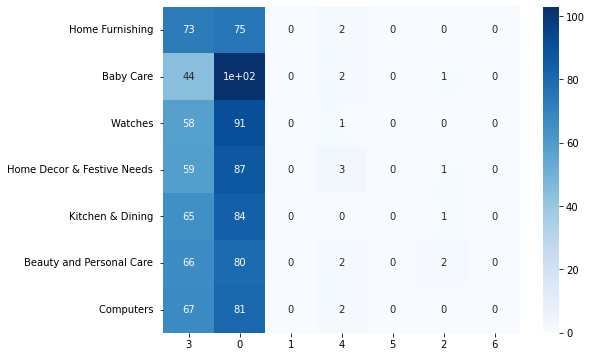

----------
test n_features = 500
calcul des descripteurs par image


100%|██████████| 1050/1050 [06:34<00:00,  2.66it/s] 


Nombre de descripteurs :  (517351, 128)
temps de traitement SIFT descriptor :           394.75 secondes
clustering des descripteurs
Nombre de clusters estimés :  719
Création de 719 clusters de descripteurs ...
temps de traitement kmeans :             7.97 secondes
Création des features des images (vecteurs)


1050it [00:04, 253.84it/s]


temps de création histogrammes :             4.17 secondes
Réduction de dimension : ACP
Dimensions dataset avant réduction PCA :  (1050, 719)
Dimensions dataset après réduction PCA :  (1050, 495)
ARI : 0.000
Visualisation
Correspondance des clusters :  [1 2 3 1 0 0 1]
              precision    recall  f1-score   support

           0       0.17      0.45      0.25       150
           1       0.17      0.64      0.27       150
           2       0.18      0.09      0.12       150
           3       0.50      0.01      0.01       150
           4       0.00      0.00      0.00       150
           5       0.00      0.00      0.00       150
           6       0.00      0.00      0.00       150

    accuracy                           0.17      1050
   macro avg       0.14      0.17      0.09      1050
weighted avg       0.14      0.17      0.09      1050



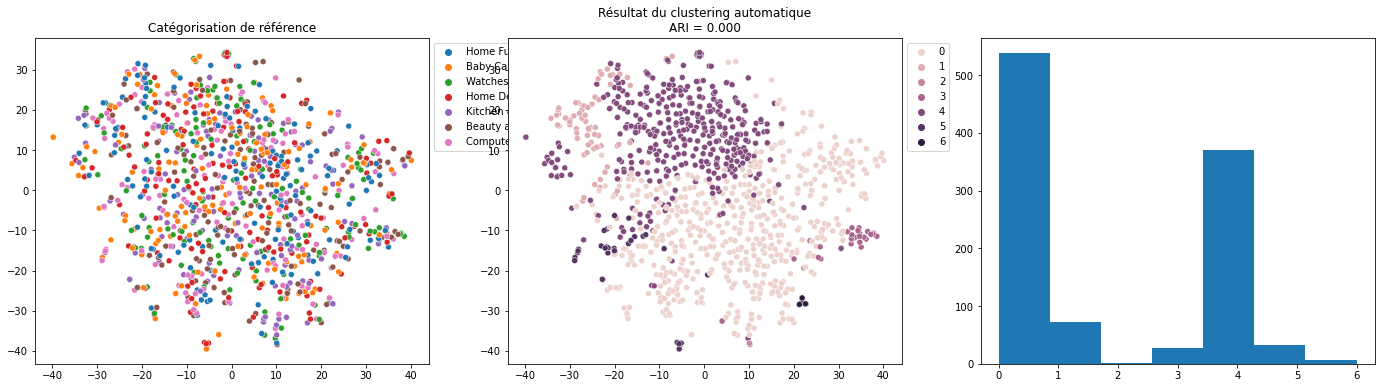

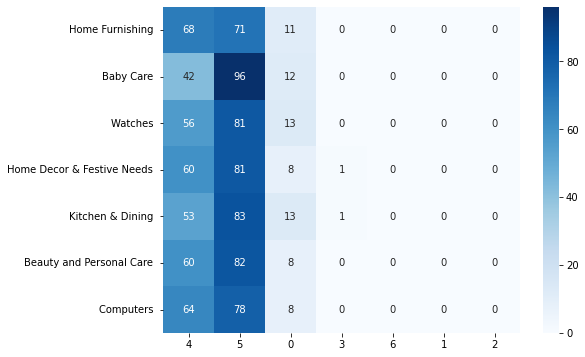

----------
test n_features = 750
calcul des descripteurs par image


100%|██████████| 1050/1050 [06:55<00:00,  2.53it/s] 


Nombre de descripteurs :  (760118, 128)
temps de traitement SIFT descriptor :           416.52 secondes
clustering des descripteurs
Nombre de clusters estimés :  872
Création de 872 clusters de descripteurs ...
temps de traitement kmeans :            13.76 secondes
Création des features des images (vecteurs)


1050it [00:05, 186.72it/s]


temps de création histogrammes :             5.67 secondes
Réduction de dimension : ACP
Dimensions dataset avant réduction PCA :  (1050, 872)
Dimensions dataset après réduction PCA :  (1050, 553)
ARI : -0.000
Visualisation
Correspondance des clusters :  [6 2 1 5 5 3 1]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       150
           1       0.16      0.57      0.25       150
           2       0.20      0.17      0.19       150
           3       0.50      0.01      0.01       150
           4       0.00      0.00      0.00       150
           5       0.43      0.02      0.04       150
           6       0.16      0.42      0.24       150

    accuracy                           0.17      1050
   macro avg       0.21      0.17      0.10      1050
weighted avg       0.21      0.17      0.10      1050



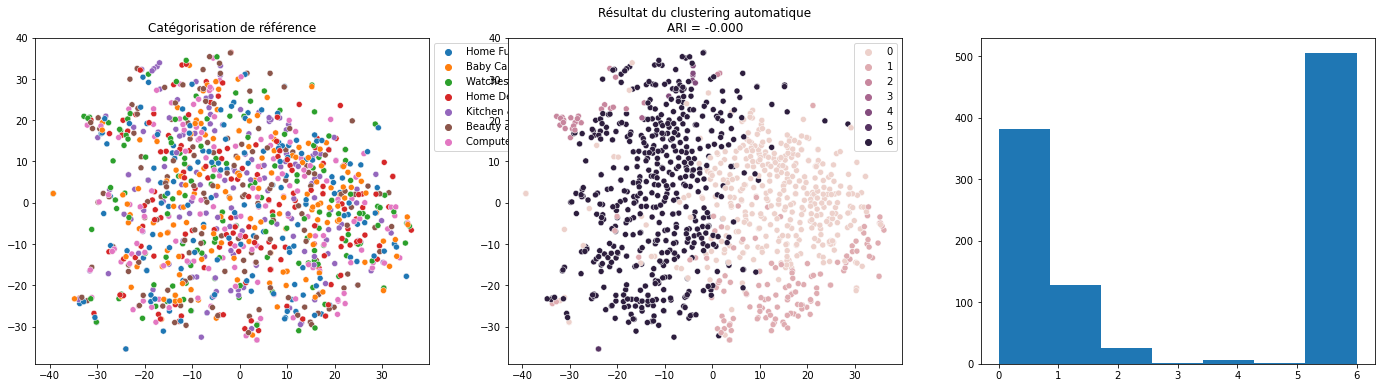

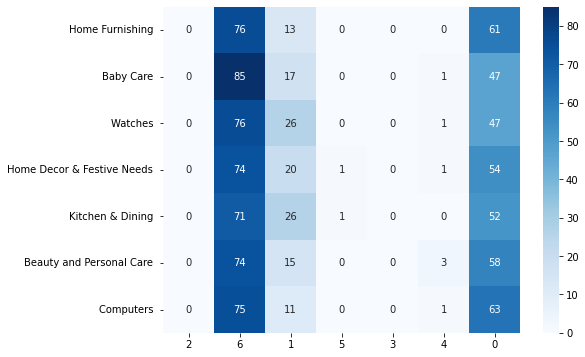

In [42]:
n_features = [0, 250, 500, 750]
compteur = 1

plt.figure(figsize=(14, 28))
for nfeat in n_features:
    sift_descripteurs = []
    print('-'*10)
    print('test n_features = {}'.format(nfeat))
    temps1=time.time()
    print('calcul des descripteurs par image')
    sift = cv2.xfeatures2d.SIFT_create(nfeatures=nfeat)
    for image_num in tqdm(range(len(list_photos))):
        kp, des = sift_calcul(path, list_photos, image_num)
        sift_descripteurs.append(des)
    sift_descripteurs_by_img = np.asarray(sift_descripteurs)
    sift_descripteurs_all    = np.concatenate(sift_descripteurs_by_img, axis=0)
    print("Nombre de descripteurs : ", sift_descripteurs_all.shape)

    duration1=time.time()-temps1
    print("temps de traitement SIFT descriptor : ", "%15.2f" % duration1, "secondes")

    print('clustering des descripteurs')
    k = int(round(np.sqrt(len(sift_descripteurs_all)),0))
    print("Nombre de clusters estimés : ", k)
    print("Création de",k, "clusters de descripteurs ...")
    temps2=time.time()
    kmeans = clustering_descripteurs(k, sift_descripteurs_all)
    duration2=time.time()-temps2
    print("temps de traitement kmeans : ", "%15.2f" % duration2, "secondes")

    # Creation of a matrix of histograms
    print('Création des features des images (vecteurs)')
    temps3=time.time()
    hist_vectors=[]

    for i, image_desc in tqdm(enumerate(sift_descripteurs_by_img)) : 
        hist = build_histogram(kmeans, image_desc, i) #calculates the histogram
        hist_vectors.append(hist) #histogram is the feature vector
    im_features = np.asarray(hist_vectors)
    duration3=time.time()-temps3
    print("temps de création histogrammes : ", "%15.2f" % duration3, "secondes")

    # Réduction de dimension
    feat_pca = reduction_dimension(X=im_features)

    # Classification finale
    y_pred, ARI = clustering_7classes(X=feat_pca, labels=labels)

    print('Visualisation')
    visu_resultats(features=feat_pca, y_pred=y_pred, ARI=ARI)
    erreur_attribution(y_true=labels_int, y_pred=y_pred, labels=labels)
    compteur += 1
    plt.show()

n_feature = 250 fournis un ARI equivalent à 0.002.

### Test k pour regrouper les descripteurs

calcul des descripteurs par image


100%|██████████| 1050/1050 [12:57<00:00,  1.35it/s] 



Nombre de descripteurs :  (262397, 128)
temps de traitement SIFT descriptor :           777.65 secondes
----------
Test de k = 512 pour regrouper les descripteurs
Création de 512 clusters de descripteurs ...
temps de traitement kmeans :             4.93 secondes
Création des features des images (vecteurs)


1050it [00:03, 332.74it/s]


temps de création histogrammes :             3.19 secondes
Réduction de dimension : ACP
Dimensions dataset avant réduction PCA :  (1050, 512)
Dimensions dataset après réduction PCA :  (1050, 403)
Classification en 7 clusters
ARI : 0.002
Visualisation
Correspondance des clusters :  [1 1 3 0 1 1 5]
              precision    recall  f1-score   support

           0       0.17      0.49      0.25       150
           1       0.17      0.69      0.27       150
           2       0.00      0.00      0.00       150
           3       0.25      0.02      0.04       150
           4       0.00      0.00      0.00       150
           5       0.40      0.01      0.03       150
           6       0.00      0.00      0.00       150

    accuracy                           0.17      1050
   macro avg       0.14      0.17      0.08      1050
weighted avg       0.14      0.17      0.08      1050



<Figure size 1008x2016 with 0 Axes>

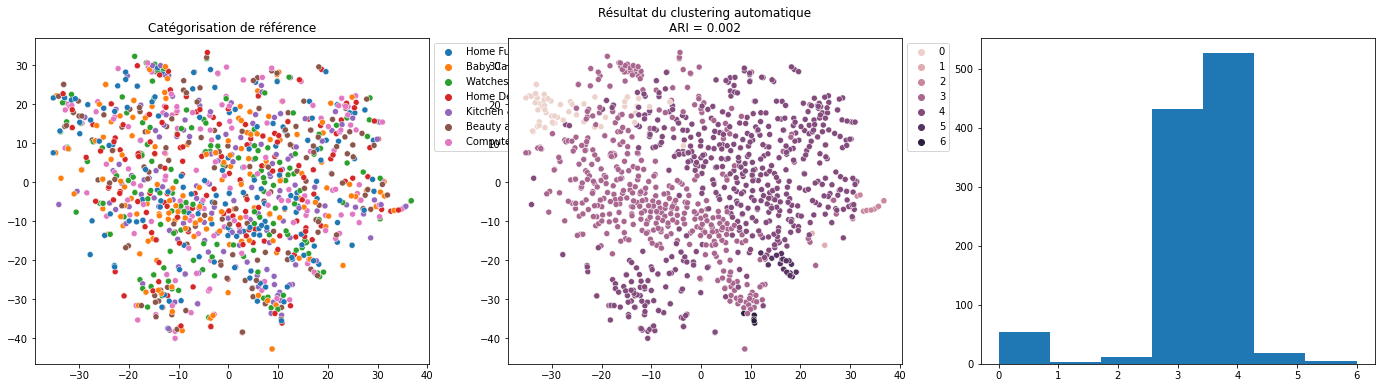

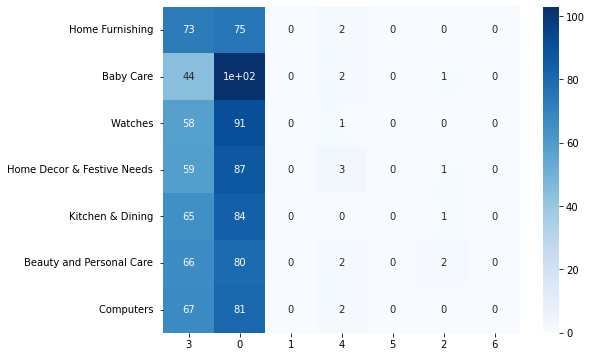

----------
Test de k = 70 pour regrouper les descripteurs
Création de 70 clusters de descripteurs ...
temps de traitement kmeans :             1.00 secondes
Création des features des images (vecteurs)


1050it [00:02, 488.00it/s]


temps de création histogrammes :             2.16 secondes
Réduction de dimension : ACP
Dimensions dataset avant réduction PCA :  (1050, 70)
Dimensions dataset après réduction PCA :  (1050, 58)
Classification en 7 clusters
ARI : 0.000
Visualisation
Correspondance des clusters :  [1 4 6 2 0 5 0]
              precision    recall  f1-score   support

           0       0.18      0.43      0.25       150
           1       0.16      0.47      0.24       150
           2       0.19      0.12      0.15       150
           3       0.00      0.00      0.00       150
           4       0.24      0.17      0.20       150
           5       0.40      0.07      0.11       150
           6       0.25      0.03      0.05       150

    accuracy                           0.18      1050
   macro avg       0.20      0.18      0.14      1050
weighted avg       0.20      0.18      0.14      1050



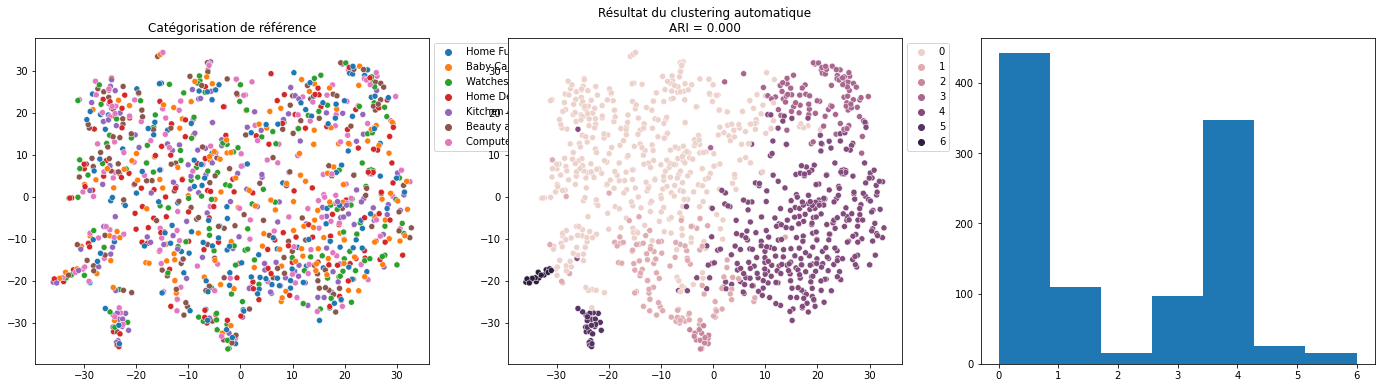

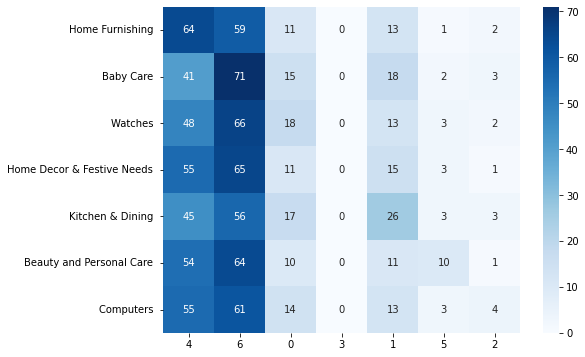

----------
Test de k = 291 pour regrouper les descripteurs
Création de 291 clusters de descripteurs ...
temps de traitement kmeans :             2.19 secondes
Création des features des images (vecteurs)


1050it [00:02, 417.39it/s]


temps de création histogrammes :             2.52 secondes
Réduction de dimension : ACP
Dimensions dataset avant réduction PCA :  (1050, 291)
Dimensions dataset après réduction PCA :  (1050, 240)
Classification en 7 clusters
ARI : 0.002
Visualisation
Correspondance des clusters :  [0 6 1 0 0 3 1]
              precision    recall  f1-score   support

           0       0.18      0.55      0.27       150
           1       0.17      0.65      0.27       150
           2       0.00      0.00      0.00       150
           3       0.50      0.01      0.01       150
           4       0.00      0.00      0.00       150
           5       0.00      0.00      0.00       150
           6       0.26      0.03      0.06       150

    accuracy                           0.18      1050
   macro avg       0.16      0.18      0.09      1050
weighted avg       0.16      0.18      0.09      1050



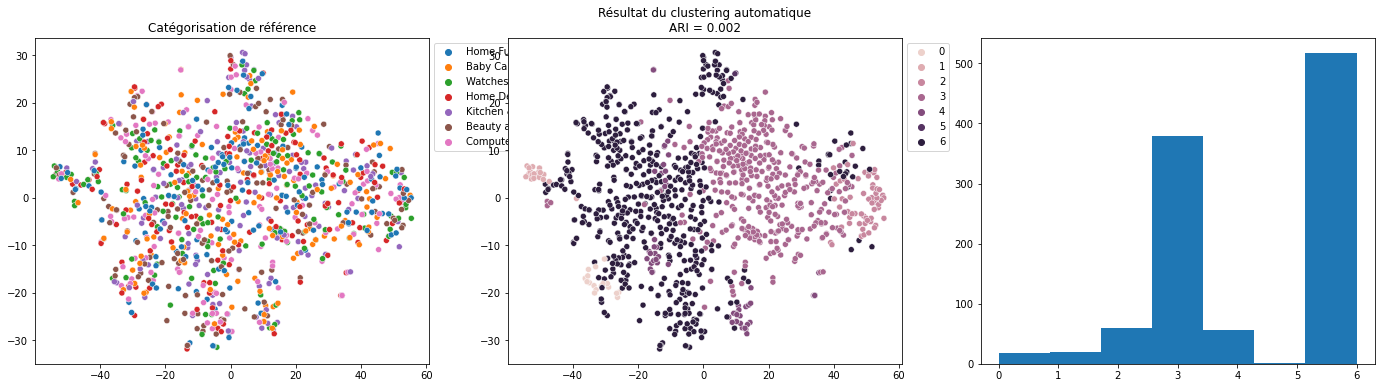

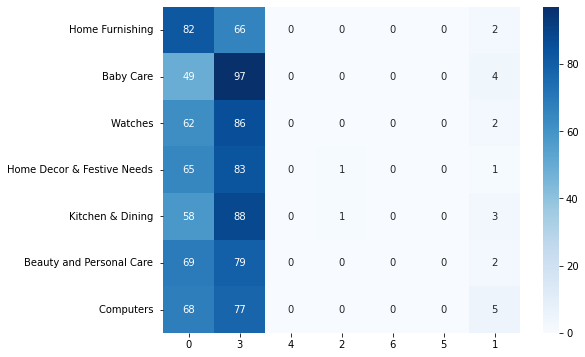

In [44]:
compteur = 1
sift_descripteurs = []

temps1=time.time()
print('calcul des descripteurs par image')
sift = cv2.xfeatures2d.SIFT_create(250)
for image_num in tqdm(range(len(list_photos))):
    kp, des = sift_calcul(path, list_photos, image_num)
    sift_descripteurs.append(des)
sift_descripteurs_by_img = np.asarray(sift_descripteurs)
sift_descripteurs_all    = np.concatenate(sift_descripteurs_by_img, axis=0)

print()
print("Nombre de descripteurs : ", sift_descripteurs_all.shape)

duration1=time.time()-temps1
print("temps de traitement SIFT descriptor : ", "%15.2f" % duration1, "secondes")

'''
liste des valeurs possibles de k :
min = 10*nb classe cible
max = racine(nb_descripteurs)
valeur intermédiaire = moyenne(min, max)
'''
k_values = [int(round(np.sqrt(len(sift_descripteurs_all)),0)),
            70,
            int(np.mean([70, round(np.sqrt(len(sift_descripteurs_all)),0)]))]

plt.figure(figsize=(14, 28))
for k in k_values:
    print('-'*10)
    print('Test de k = {} pour regrouper les descripteurs'.format(k))
    print("Création de",k, "clusters de descripteurs ...")
    temps2=time.time()
    kmeans = clustering_descripteurs(k, sift_descripteurs_all)
    duration2=time.time()-temps2
    print("temps de traitement kmeans : ", "%15.2f" % duration2, "secondes")

    # Creation of a matrix of histograms
    print('Création des features des images (vecteurs)')
    temps3=time.time()
    hist_vectors=[]

    for i, image_desc in tqdm(enumerate(sift_descripteurs_by_img)) :
        hist = build_histogram(kmeans, image_desc, i) #calculates the histogram
        hist_vectors.append(hist) #histogram is the feature vector
    im_features = np.asarray(hist_vectors)
    duration3=time.time()-temps3
    print("temps de création histogrammes : ", "%15.2f" % duration3, "secondes")

    # Réduction de dimension
    feat_pca = reduction_dimension(X=im_features)
    
    # Classification finale
    print('Classification en 7 clusters')
    y_pred, ARI = clustering_7classes(X=feat_pca, labels=labels)
 
    print('Visualisation')
    visu_resultats(features=feat_pca, y_pred=y_pred, ARI=ARI)
    erreur_attribution(y_true=labels_int, y_pred=y_pred, labels=labels)
    plt.show()
    compteur += 1

[[ 4  2  8 66 12  0 58]
 [ 3  4 11 39  7  0 86]
 [ 3  2 11 51  8  0 75]
 [ 3  1  6 54  8  1 77]
 [ 0  3 11 53  5  1 77]
 [ 3  2  2 57  9  0 77]
 [ 2  5 10 59  7  0 67]]
<class 'numpy.ndarray'>
Correspondance des clusters :  [2 6 4 0 5 3 1]
              precision    recall  f1-score   support

           0       0.17      0.44      0.25       150
           1       0.17      0.57      0.26       150
           2       0.17      0.02      0.04       150
           3       0.50      0.01      0.01       150
           4       0.19      0.07      0.11       150
           5       0.16      0.06      0.09       150
           6       0.26      0.03      0.06       150

    accuracy                           0.17      1050
   macro avg       0.23      0.17      0.12      1050
weighted avg       0.23      0.17      0.12      1050



<AxesSubplot:>

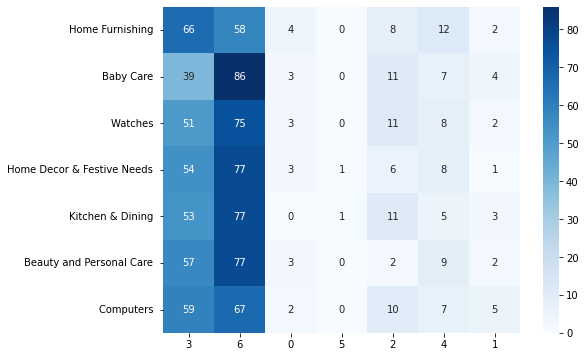

In [48]:
# Calcul de la matrice de confusion
conf_mat = confusion_matrix(y_true=labels_int, y_pred=y_pred)
print(conf_mat)
# Alignement le long de la diagonale
# corresp = np.argmax(conf_mat, axis=0)
corresp = np.array([2,6,4,0,5,3,1])
print(type(corresp))
print("Correspondance des clusters : ", corresp)
labels_df = pd.Series(labels, name="labels").to_frame()
labels_df['y_true'] = labels_int
labels_df['y_pred'] = y_pred
labels_df['y_pred_transform'] = labels_df['y_pred'].apply(
    lambda x: corresp[x])
# re-calcul de la nouvelle matrice de confusion
conf_mat = confusion_matrix(labels_int, labels_df.y_pred_transform)
print(classification_report(labels_int, labels_df.y_pred_transform))
# visu
corresp = pd.DataFrame(corresp, columns=['corresp'])
corresp = corresp.sort_values(by='corresp', axis=0)
index = list(corresp.index)
df_cm = pd.DataFrame(conf_mat, index=[label for label in list_labels],
                        columns=[i for i in index])
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm, annot=True, cmap="Blues")

les valeurs d'ARI ne sont pas particulièrement meilleures (valeur max = 0.02 pour k = racine du nombre de descripteur)



==> SIFT + kmeans ne permet pas de classer correctement les images.